In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("bank-full.csv",delimiter=';')

In [3]:
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# EDA

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank['job']=bank['job'].astype('category')

In [6]:
bank['marital']=bank['marital'].astype('category')
bank['education']=bank['education'].astype('category')
bank['housing']=bank['housing'].astype('category')
bank['loan']=bank['loan'].astype('category')
bank['contact']=bank['contact'].astype('category')
bank['month']=bank['month'].astype('category')
bank['poutcome']=bank['poutcome'].astype('category')
bank['y']=bank['y'].astype('category')

In [7]:
bank['default']=bank['default'].astype('category')

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [10]:
#convert category data in to numeric form

In [5]:
def fn(x):
    bank[x]=bank[x].replace('unknown',0)

In [6]:
 fn('job')

In [7]:
fn('education')

In [8]:
fn('marital')

In [9]:
fn('poutcome')

In [10]:
fn('contact')

In [11]:
fn('loan')

In [12]:
bank.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [13]:
def fn(l):
    bank[l]=bank[l].replace('no',1)
    bank[l]=bank[l].replace('yes',2)

In [14]:
fn('loan')

In [15]:
bank.loan.value_counts()

loan
1    37967
2     7244
Name: count, dtype: int64

In [16]:
bank.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [17]:
def fn(y):
    bank[y]=bank[y].replace('no',0)
    bank[y]=bank[y].replace('yes',1)

In [18]:
fn('y')

In [19]:
bank.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [20]:
bank.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: count, dtype: int64

In [21]:
def fn(a):
    bank[a]=bank[a].replace('blue-collar',1)
    bank[a]=bank[a].replace('management',2)
    bank[a]=bank[a].replace('technician',3)
    bank[a]=bank[a].replace('admin.',4)
    bank[a]=bank[a].replace('services',5)
    bank[a]=bank[a].replace('retired',6)
    bank[a]=bank[a].replace('self-employed',7)
    bank[a]=bank[a].replace('entrepreneur',8)
    bank[a]=bank[a].replace('unemployed',9)
    bank[a]=bank[a].replace('housemaid',10)
    bank[a]=bank[a].replace('student',11)
    
    

In [22]:
fn('job')

In [23]:
bank.job.value_counts()

job
1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: count, dtype: int64

In [24]:
bank.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
0             1857
Name: count, dtype: int64

In [25]:
def fn(b):
    bank[b]=bank[b].replace('secondary',1)
    bank[b]=bank[b].replace('tertiary',2)
    bank[b]=bank[b].replace('primary',3)
    

In [26]:
fn('education')

In [27]:
bank.education.value_counts()

education
1    23202
2    13301
3     6851
0     1857
Name: count, dtype: int64

In [28]:
bank.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [29]:
def fn(c):
    bank[c]=bank[c].replace('married',1)
    bank[c]=bank[c].replace('single',2)
    bank[c]=bank[c].replace('divorced',3)
    

In [30]:
fn('marital')

In [31]:
bank.marital.value_counts()

marital
1    27214
2    12790
3     5207
Name: count, dtype: int64

In [32]:
bank.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [33]:
def fn(h):
    bank[h]=bank[h].replace('yes',1)
    bank[h]=bank[h].replace('no',2)

In [34]:
fn('housing')

In [35]:
bank.housing.value_counts()

housing
1    25130
2    20081
Name: count, dtype: int64

In [36]:
bank.contact.value_counts()

contact
cellular     29285
0            13020
telephone     2906
Name: count, dtype: int64

In [37]:
def fn(d):
    bank[d]=bank[d].replace('cellular',1)
    bank[d]=bank[d].replace('telephone',2)

In [38]:
fn('contact')

In [39]:
bank.contact.value_counts()

contact
1    29285
0    13020
2     2906
Name: count, dtype: int64

In [40]:
bank.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [41]:
def fn(m):
    bank[m]=bank[m].replace('jan',1)
    bank[m]=bank[m].replace('feb',2)
    bank[m]=bank[m].replace('mar',3)
    bank[m]=bank[m].replace('apr',4)
    bank[m]=bank[m].replace('may',5)    
    bank[m]=bank[m].replace('jun',6)    
    bank[m]=bank[m].replace('jul',7)    
    bank[m]=bank[m].replace('aug',8)    
    bank[m]=bank[m].replace('sep',9)  
    bank[m]=bank[m].replace('oct',10) 
    bank[m]=bank[m].replace('nov',11)    
    bank[m]=bank[m].replace('dec',12)    

In [42]:
fn('month')

In [43]:
bank.month.value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

In [44]:
bank.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [45]:
def fn(f):
    bank[f]=bank[f].replace('yes',1)
    bank[f]=bank[f].replace('no',2)

In [46]:
fn('default')

In [47]:
bank.default.value_counts()

default
2    44396
1      815
Name: count, dtype: int64

In [48]:
bank.poutcome.value_counts()

poutcome
0          36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [49]:
def fn(p):
    bank[p]=bank[p].replace('failure',1)
    bank[p]=bank[p].replace('success',2)
    bank[p]=bank[p].replace('other',3)

In [50]:
fn('poutcome')

In [51]:
bank.poutcome.value_counts()

poutcome
0    36959
1     4901
3     1840
2     1511
Name: count, dtype: int64

In [52]:
bank['job']=pd.to_numeric(bank['job'],errors='coerce')
bank['marital']=pd.to_numeric(bank['marital'],errors='coerce')
bank['education']=pd.to_numeric(bank['education'],errors='coerce')
bank['default']=pd.to_numeric(bank['default'],errors='coerce')
bank['housing']=pd.to_numeric(bank['housing'],errors='coerce')
bank['loan']=pd.to_numeric(bank['loan'],errors='coerce')
bank['contact']=pd.to_numeric(bank['contact'],errors='coerce')
bank['month']=pd.to_numeric(bank['month'],errors='coerce')
bank['poutcome']=pd.to_numeric(bank['poutcome'],errors='coerce')
bank['y']=pd.to_numeric(bank['y'],errors='coerce')


In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [54]:
X=bank.drop('y',axis=1)

In [55]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,2,1,2,2,2143,1,1,0,5,5,261,1,-1,0,0
1,44,3,2,1,2,29,1,1,0,5,5,151,1,-1,0,0
2,33,8,1,1,2,2,1,2,0,5,5,76,1,-1,0,0
3,47,1,1,0,2,1506,1,1,0,5,5,92,1,-1,0,0
4,33,0,2,0,2,1,2,1,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,2,825,2,1,1,17,11,977,3,-1,0,0
45207,71,6,3,3,2,1729,2,1,1,17,11,456,2,-1,0,0
45208,72,6,1,1,2,5715,2,1,1,17,11,1127,5,184,3,2
45209,57,1,1,1,2,668,2,1,2,17,11,508,4,-1,0,0


In [56]:
Y=bank[['y']]
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# model building


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [59]:
classifier=LogisticRegression()

In [60]:
classifier.fit(X,Y)

C:\Users\kayve\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kayve\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
Y_pred=classifier.predict(X)

In [62]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,Y_pred)
print (confusion_matrix)

[[39252   670]
 [ 4441   848]]


In [79]:
((39252+848/39252+670+4441+848)*100)

4521102.1603994705

In [65]:
classifier.score(X_train,Y_train)

0.8871299017284419

In [66]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



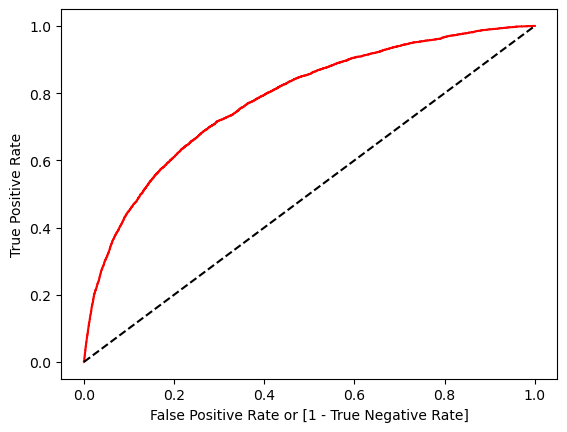

In [69]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(Y, Y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve